In [1]:
debugging = True

# Description

You will be able to select a folder containing either **tiff** or **fits** images, and the notebook will simply display the integrated signal

# Python Import

In [2]:
from __code.__all import custom_style
custom_style.style()

In [3]:
from __code import utilities, gui_widgets, file_handler, fileselector
import NeuNorm
import re
from NeuNorm.normalization import Normalization

import matplotlib.patches as patches
%matplotlib notebook
import matplotlib.pyplot as plt

if debugging:
    ipts = 19558
else:
    ipts = utilities.get_ipts()
working_dir = utilities.get_working_dir(ipts=ipts, debugging=debugging)
print("Working dir: {}".format(working_dir))

Working dir: /Volumes/my_book_thunderbolt_duo/IPTS/IPTS_19558


# Select Input Folder

In [4]:
input_folder_ui = fileselector.FileSelectorPanel(instruction='Select Input Folder', type='directory', start_dir=working_dir, multiple=False)
input_folder_ui.show()

# Load Stack

In [ ]:
input_folder = input_folder_ui.result_full_path()
list_fits = glob.glob(input_folder + '/*.fits')

# remove '_SummerdImg.fits file from list
p = re.compile('.*_SummedImg.fits')
for _index, _file in enumerate(list_fits):
    if p.match(_file):
        list_fits.pop(_index)

In [5]:
stack = file_handler.load_data(filenames=list_fits, showing_progress=True)

<IPython.core.display.Javascript object>


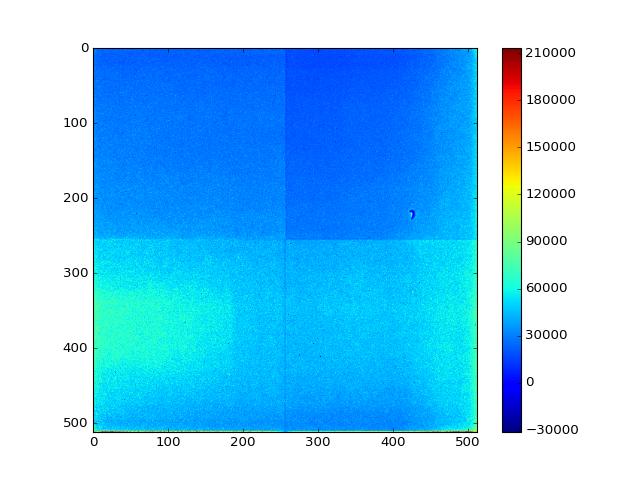

In [7]:
integrated_stack = np.array(stack).sum(axis=0)

plt.figure()
plt.imshow(integrated_stack) # cmap='viridis'
plt.colorbar()